In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def f(x,contador):
  return 0.65-(0.75/(1+x**2))-0.65*x*math.atan(1/x),contador+1

# Implementaciones

## Busqueda exhaustiva

In [58]:
def busqueda_exh(a,b,n):

  step=(b-a)/n


  x1=a
  x2=x1+step
  x3=x2+step
    
    
    
  while(x1==0 or x2==0 or x3==0):
    x1=x2
    x2=x3
    x3=x2+step
    
  contador=0
    
  y1,contador=f(x1,contador)
  y2,contador=f(x2,contador)
  y3,contador=f(x3,contador)

    
  while x3 <= b:
    while(x1==0 or x2==0 or x3==0):
      x1=x2
      x2=x3
      x3=x2+step
            

    if ((y1>=y2) and (y2<=y3)):

      x1="{0:.3f}".format(x1)
      x3="{0:.3f}".format(x3)

      return [x1,x3,contador]


    x1=x2
    x2=x1+step
    x3=x2+step

    y1=y2
    y2=y3
    y3,contador=f(x3,contador)

        

        

## Division de intervalos por la mitad

In [12]:
def intervalos_mitad(a,b,epsilon):
  x_m=(a+b)/2
  L=b-a
    
    
  fm,contador_real=f(x_m,0)
    

  #Contador_hackerrank se uso para pasar los casos de hackerrank, ya que mi implementacion hace menos evaluaciones de la funcion objetivo
  Contador_hackerrank=1
    
  while abs(L)>epsilon:
    x1=a+(L/4)
    x2=b-(L/4)
        
    f1,contador_real=f(x1,contador_real)

    Contador_hackerrank+=2

        
    if f1<fm:
      b=x_m
      x_m=x1
      fm=f1
            
    else:
      f2,contador_real=f(x2,contador_real)

            
      if f2<fm:
        a=x_m
        x_m=x2
        fm=f2
                
            
            
      else:
        a=x1
        b=x2
            
    L=b-a
        
  a="{0:.3f}".format(a)
  b="{0:.3f}".format(b)


  return [a,b,contador_real]
  #print(f'({a},{b})')
  #print(contador_real)
  # print(Contador_hackerrank)

## Fibonacci

In [13]:
def F(n):
    l_f=[1,1]
    for i in range(2,n+1):
        l_f.append(l_f[i-1]+l_f[i-2])
        
    return l_f[-1]

def metodo_fibonacci(a,b,n):
  n=int(n)
    
  L=b-a
    
  contador=0
    
  for i in range(2,n+1):
    l_k= (F(n-i)/F(n))*L
        
    x1=a+l_k
    x2=b-l_k
        
    if i==2:
      f1,contador=f(x1,contador)
      f2,contador=f(x2,contador)
        
        
    else:   
      if f1<f2:
        f2=f1
        f1,contador=f(x1,contador)
                          
      else:
        f1=f2
        f2,contador=f(x2,contador)
            
    if f1>f2:
      a=x1
    else:
      b=x2


        
  a="{0:.3f}".format(a)
  b="{0:.3f}".format(b)
  return [a,b,contador]
  #print(f'({a},{b})')
  #print(contador)

## Seccion Dorada

In [14]:
def norm(w,a,b):
    return (w*(b-a))+a

def seccion_dorada(a,b,epsilon):
    #a,b,epsioln=[float(i) for i in input().split(',')]

    
    aw=0
    bw=1
    lw=1
    
    contador=0
    begin=True
    
    while lw > (epsilon/(b-a)):
        
        if begin:
            w1=aw+(0.618*lw)
            w1n=norm(w1,a,b)
            
            w2=bw-(0.618*lw)
            w2n=norm(w2,a,b)
            
            f1,contador=f(w1n,contador)
            f2,contador=f(w2n,contador)
            begin=False
            
        else:
            if f1<f2:
                f2=f1
                w2=w1

                w1=aw+(0.618*lw)
                w1n=norm(w1,a,b)
                
                f1,contador=f(w1n,contador)
            else:
                f1=f2
                w1=w2

                w2=bw-(0.618*lw)
                w2n=norm(w2,a,b)
                
                f2,contador=f(w2n,contador)
            
        if f1<f2:
            aw=w2
        else:
            bw=w1
        
        lw=bw-aw
        

        
    aw="{0:.3f}".format(norm(aw,a,b))
    bw="{0:.3f}".format(norm(bw,a,b))
    return [aw,bw,contador]
    # print(f'({aw},{bw})')
    # print(contador)

In [60]:

b_e=(busqueda_exh(0,3,6000))
i_m=(intervalos_mitad(0,3,0.001))
m_f=(metodo_fibonacci(0,3,18))
s_d=(seccion_dorada(0,3,0.001))


print(f'Intervalo por Búsqueda exhaustiva: ({b_e[0]},{b_e[1]}) con {b_e[2]} evaluaciones de la funcion a minimizar \n')

print(f'Intervalo por División de intervalos por la mitad: ({i_m[0]},{i_m[1]}) con {i_m[2]} evaluaciones de la funcion a minimizar \n')

print(f'Intervalo por Método de Fibonacci: ({m_f[0]},{m_f[1]}) con {m_f[2]} evaluaciones de la funcion a minimizar \n')

print(f'Intervalo por Método de la sección dorada: ({s_d[0]},{s_d[1]}) con {s_d[2]} evaluaciones de la funcion a minimizar')

Intervalo por Búsqueda exhaustiva: (0.481,0.482) con 963 evaluaciones de la funcion a minimizar 

Intervalo por División de intervalos por la mitad: (0.480,0.481) con 20 evaluaciones de la funcion a minimizar 

Intervalo por Método de Fibonacci: (0.480,0.481) con 18 evaluaciones de la funcion a minimizar 

Intervalo por Método de la sección dorada: (0.480,0.481) con 18 evaluaciones de la funcion a minimizar


#Validacion con calculo teorico

## Busqueda exhaustiva

Queremos una precision de 0.001 por lo que, como tenemos 3 variables x1, x2 y x3 queremos que la distancia entre x1-x2 y x2-x3 sea de 0.001 tenemos que la distancia total del intervalo es: $$0.001 * 2$$ y dada la formula: $$\frac{b-a}{n}= 0.001 * 2$$ "pasamos el 2 al otro lado": $$\frac{2}{1}\frac{b-a}{n}=\frac{2(b-a)}{n}=0.001$$ Despejamos n: $$n=\frac{2(a-b)}{0.001}$$ Dado el interfavol [0,3]:$$a=0,b=3, \frac{2(3-0)}{0.001}=\frac{6}{0.001}=6000$$
Se calculan f(x) 3 veces en la primer iteracion, despues de eso se calcula una unica vez por iteracion por lo que el numero maximo de avaluaciones de f(x) seria de $\approx$ 6000. En nuestro algoritmo nos toma 963 evaluaciones de f(x)

## División de intervalos por la mitad:
Con la formula para calcular las iteraciones necesarias para obtener una precision que en este caso $\epsilon=0.001$:$$2\frac{\log(\epsilon/L_0)}{\log(1/2)}$$ Sustituimos: $$2\frac{\log(0.001/(3))}{\log(1/2)} \approx 23.10$$ Nuestro algoritmo nos regresa que evaluamos la funcion 20 veces

## Método de Fibonacci
Dada la formula para calular la longitud de un intervalo despues de $n$ iteraciones: $$\frac{1}{F_n}L = \epsilon$$ 
Con $L=b-a$ y despejando $F_n$:$$F_n=\frac{1}{\epsilon}(b-a)$$
Sustituimos:$$F_n=\frac{3}{0.001}=3000$$
Esto nos da $n=18$ y nuestro algoritmo nos regresa 18 evaluaciones

## Método de la sección dorada
Dada la funcion:$$n=\frac{\log{(\epsilon/b-a)}}{\log{0.618}}+1$$
Sustituimos:$$n=\frac{\log{(0.001/3)}}{\log{0.618}}+1 \approx 17.63$$
Y nuestro algoritmo nos regresa 18 evaluaciones

#Grafica

In [55]:
x=0
y=0

x = np.arange(0,3,0.1)
y = [f(i,0)[0] for i in x]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


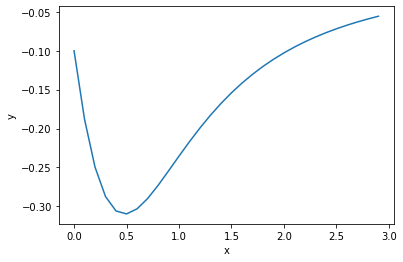

In [56]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# El metodo mas eficiente
El metodo mas eficiente es Seccion dorada, ya que en menos iteraciones consigue la misma presicion que el resto de metodos en mas iteraciones